# Теоретична част

Имаме следната задача на Коши

$$
\begin{cases}
y'=f(y, x)\\
y(x_0) = y_0
\end{cases}
$$

Интегрираме уравнението формално, тоест в граници от $x_0$ до $x$.

$$\displaystyle \int \limits_{x_0}^{x} y'(t) \space dt = \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle \int \limits_{x_0}^{x} \space dy(t) = \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle y(x) - y(x_0) = \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle y(x) = y(x_0) + \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle y(x) = y_0 + \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

Така сведохме задачата на Коши до *интегрално уравнение*. Това означава, че вече вместо да имаме уравнение с $y$ и $y'$, имаме уравнение само с $y$. Това ни позволява да направим последователни приближения, започвайки с $y_0$ от задачата на Коши и обща форма, която се задава по следния начин:

$$\displaystyle y_{i+1}(x) = y_0 + \int \limits_{x_0}^{x} f(y_{i}(t), t) \space dt$$

## Задача

Дадена е следната задача на Коши

$$
\begin{cases}
y'=y\\
y(0) = 1
\end{cases}
$$

Да се намерят първите 5 приближения с метода на Пикар аналитично.

Да се начертаят с MATLAB/Octave в една координатна система графиките на първите 5 приближения на задачата на Коши по метода на Пикар в интервала $x\in[-2, 2]$.

## Аналитично решение

$$
\begin{cases}
y' = y, \\
y(0) = 1.
\end{cases}
$$

Интегралното уравнение по метода на Пикар е:

$$
\displaystyle y_{i+1}(x) = y_0 + \int \limits_{x_0}^{x} y_i(t) \space dt
$$

$$
\displaystyle y_{i+1}(x) = 1 + \int \limits_{0}^{x} y_i(t) \space dt
$$

### Първо приближение:

$$
y_0 = 1.
$$

### Второ приближение:

$$
y_1 = 1 + \int \limits_{0}^{x} 1 \space dt = 1 + \left[ t \right]_{0}^{x}.
$$

$$
y_1 = 1 + x.
$$

### Трето приближение:

$$
y_2 = 1 + \int \limits_{0}^{x} (1 + t) \space dt.
$$

$$
= 1 + \left[ t + \frac{t^2}{2} \right]_{0}^{x}.
$$

$$
y_2 = 1 + x + \frac{x^2}{2}.
$$

### Четвърто приближение:

$$
y_3 = 1 + \int \limits_{0}^{x} \left(1 + t + \frac{t^2}{2} \right) \space dt.
$$

$$
= 1 + \left[ t + \frac{t^2}{2} + \frac{t^3}{6} \right]_{0}^{x}.
$$

$$
y_3 = 1 + x + \frac{x^2}{2} + \frac{x^3}{6}.
$$

### Пето приближение:

$$
y_4 = 1 + \int \limits_{0}^{x} \left(1 + t + \frac{t^2}{2} + \frac{t^3}{6} \right) \space dt.
$$

$$
= 1 + \left[ t + \frac{t^2}{2} + \frac{t^3}{6} + \frac{t^4}{24} \right]_{0}^{x}.
$$

$$
y_4 = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \frac{x^4}{24}.
$$

Така виждаме, че приближенията формират реда на Тейлър на $e^x$.

Също е добре да отбележим, че последователните приближения стават все по-точни в околност на точката $(x_0, y_0)$

In [3]:
warning('off','all');
pkg load symbolic;
graphics_toolkit("gnuplot");

In [20]:
syms x y(x)

dsolve(diff(y, x) == y, y(0) == 1)

ans = (sym)

   x
  e 



In [9]:
syms x y f

x_0 = 0;
y_0 = 1;

approximations_count = 5;

f(x, y) = y;

approximations = sym([]);

approximations(1) = 1;

for i = 1:approximations_count-1
    approximations(i+1) = approximations(1) + int(f(x, approximations(i)), x, x_0, x);
end

In [10]:
transpose(approximations)

ans = (sym 5x1 matrix)

  [         1          ]
  [                    ]
  [       x + 1        ]
  [                    ]
  [      2             ]
  [     x              ]
  [     -- + x + 1     ]
  [     2              ]
  [                    ]
  [   3    2           ]
  [  x    x            ]
  [  -- + -- + x + 1   ]
  [  6    2            ]
  [                    ]
  [ 4    3    2        ]
  [x    x    x         ]
  [-- + -- + -- + x + 1]
  [24   6    2         ]



In [11]:
x_axis = -2:0.2:2;

for i = 1:approximations_count-1
    approximations_values(i, :) = double(subs(approximations(i), x, x_axis));
end

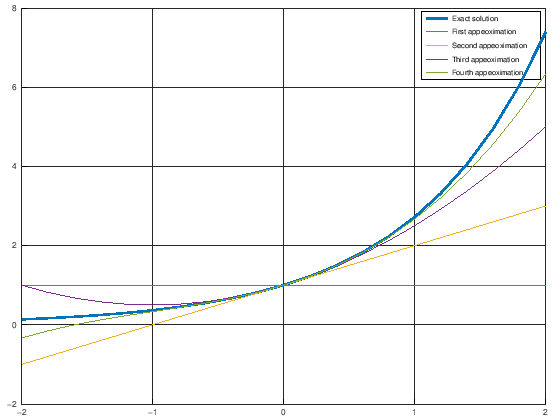

In [18]:
hold on;
grid on;

plot(x_axis, exp(x_axis), "LineWidth", 6)

for i = 1:approximations_count-1
    plot(x_axis, approximations_values(i, :), "LineWidth", 2)
end

legend("Exact solution", "First appeoximation", "Second appeoximation", "Third appeoximation", "Fourth appeoximation", "Fifth appeoximation")